In [1]:
import BR_ML as brada
import pandas as pd

In [2]:
print(brada.__version__)

0.0.1


In [3]:
pequim = pd.read_csv('datasets/BeijingPM20100101_20151231.csv')
pequim.dropna(inplace=True)

pequim['date'] = pequim['year'].astype(str) + '-' + pequim['month'].astype(str) + '-' + pequim['day'].astype(str)
pequim.drop_duplicates(subset='date', inplace=True)
pequim['date'] = pd.to_datetime(pequim['date'])
pequim.sort_values('date', inplace=True)
pequim.set_index('date', inplace=True)
pequim.index = pd.DatetimeIndex(pequim.index).to_period('D')

pequim.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [4]:
black_friday = pd.read_csv('datasets/BlackFriday.csv')
black_friday.columns                           

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
fb = pd.read_csv('datasets/FB.csv')
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
fb['Date'] = pd.to_datetime(fb['Date'])
fb = fb.set_index('Date')

In [7]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-16,106.839996,107.870003,106.620003,107.320000,107.320000,22129600
2015-11-23,107.190002,107.470001,104.389999,105.449997,105.449997,64538400
2015-11-30,105.839996,107.919998,103.349998,106.180000,106.180000,112055400
2015-12-07,106.480003,106.910004,101.910004,102.120003,102.120003,103276000
2015-12-14,102.290001,107.750000,101.459999,104.040001,104.040001,126762800


<AxesSubplot:>

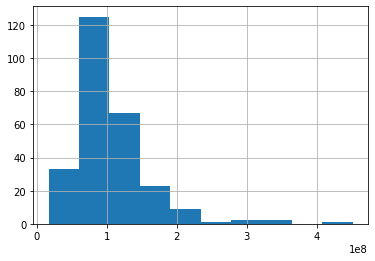

In [9]:
fb['Volume'].hist()

In [33]:
a = pd.cut(fb['Volume'], bins=5)

In [34]:
a

Date
2015-11-16    (16456464.116, 103901892.8]
2015-11-23    (16456464.116, 103901892.8]
2015-11-30     (103901892.8, 190912269.6]
2015-12-07    (16456464.116, 103901892.8]
2015-12-14     (103901892.8, 190912269.6]
                         ...             
2020-10-26     (103901892.8, 190912269.6]
2020-11-02     (103901892.8, 190912269.6]
2020-11-09    (16456464.116, 103901892.8]
2020-11-16    (16456464.116, 103901892.8]
2020-11-20    (16456464.116, 103901892.8]
Name: Volume, Length: 263, dtype: category
Categories (5, interval[float64]): [(16456464.116, 103901892.8] < (103901892.8, 190912269.6] < (190912269.6, 277922646.4] < (277922646.4, 364933023.2] < (364933023.2, 451943400.0]]

In [36]:
import numpy as np
a.apply(lambda x: np.mean([x.left, x.right]))

Date
2015-11-16    6.017918e+07
2015-11-23    6.017918e+07
2015-11-30    1.474071e+08
2015-12-07    6.017918e+07
2015-12-14    1.474071e+08
                  ...     
2020-10-26    1.474071e+08
2020-11-02    1.474071e+08
2020-11-09    6.017918e+07
2020-11-16    6.017918e+07
2020-11-20    6.017918e+07
Name: Volume, Length: 263, dtype: category
Categories (5, float64): [6.017918e+07 < 1.474071e+08 < 2.344175e+08 < 3.214278e+08 < 4.084382e+08]

In [37]:
def continuous_to_categorical(df, continuos_columns=[], bins=5):
    
    import pandas as pd
    
    df_temp = df.copy()
    
    if len(continuos_columns) == 0:
        continuos_columns = df_temp.columns
    
    for col in continuos_columns:
        
        cat_col = pd.cut(df_temp[col], bins=bins)
        cat_col = cat_col.apply(lambda x: np.mean([x.left, x.right]))
        new_col_name = col + '_categorical'
        df_temp.loc[:, new_col_name] = cat_col
        
    return df_temp

In [43]:
df_temp = continuous_to_categorical(fb, bins=10)

In [49]:
df_temp['Close_categorical'].value_counts()

184.38049999999998    65
124.7735              44
164.5115              39
144.64249999999998    34
204.2495              25
104.805               25
263.8565              11
224.11849999999998     9
243.9875               6
283.7255               5
Name: Close_categorical, dtype: int64

In [51]:
(94*0.6*5.42)-600

-294.312